<Figure size 1200x1000 with 0 Axes>

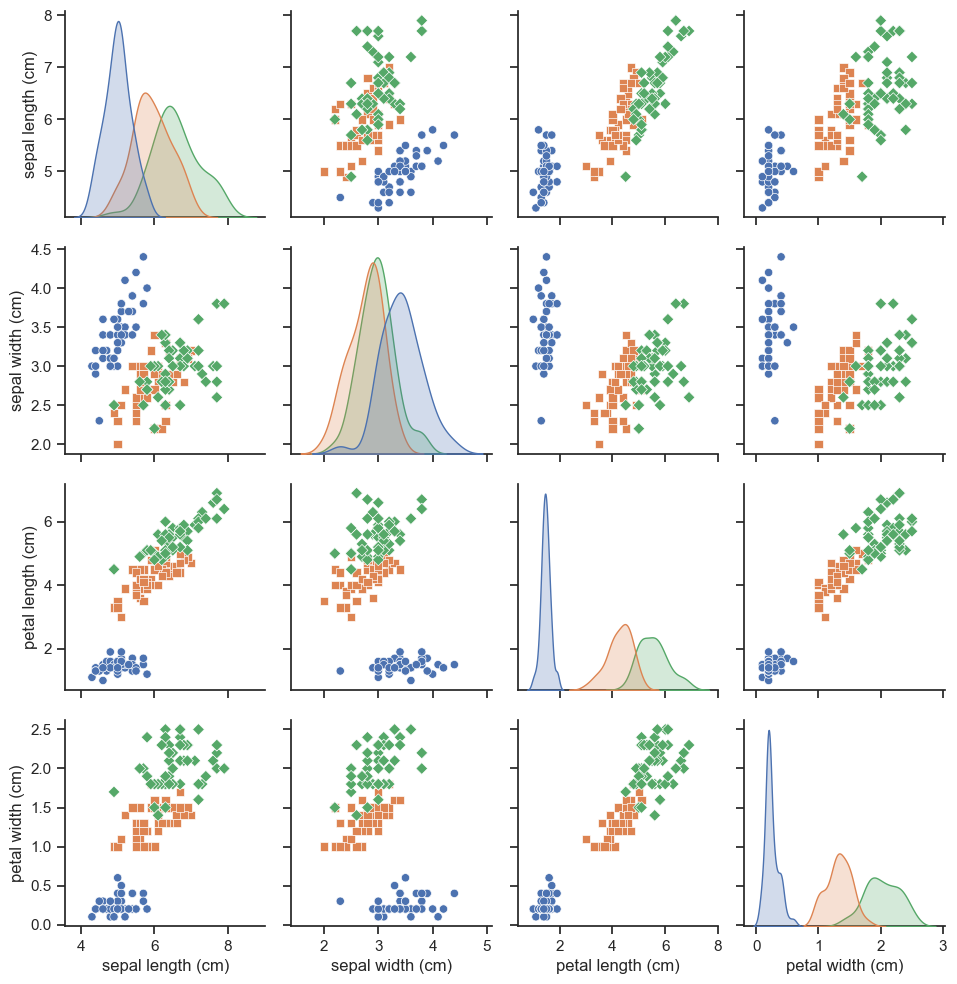

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Set the style and figure size
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12, 10))

# Create the pair plot
g = sns.pairplot(df, hue="species", markers=["o", "s", "D"], height=2.5)

# Remove the original legend
g._legend.remove()

# Adjust the layout to make room for the legend
plt.tight_layout()
g.fig.subplots_adjust(right=0.85)

plt.show()

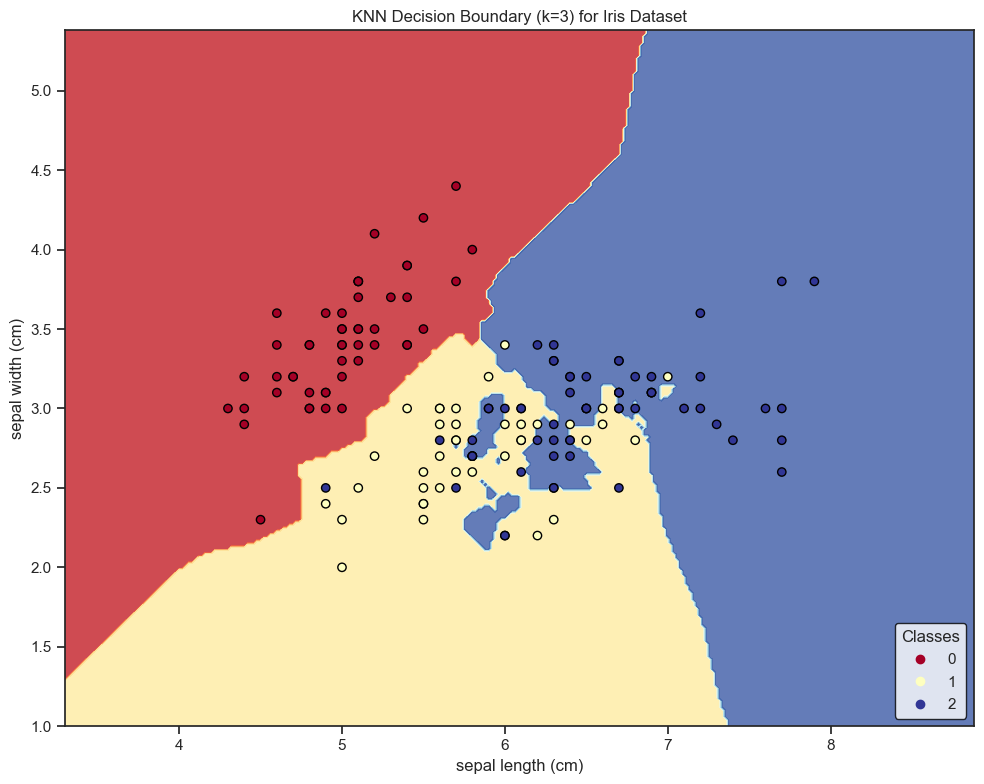

Accuracy: 0.76


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # we only take the first two features
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KNN Decision Boundary (k=3) for Iris Dataset')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title="Classes", loc="lower right")
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

# Print the accuracy score
print(f"Accuracy: {knn.score(X_test, y_test):.2f}")

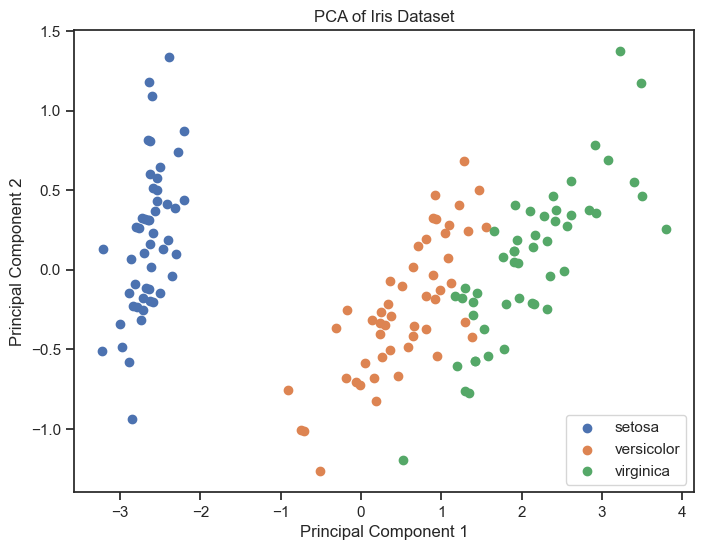

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for easier plotting
df = pd.DataFrame(X_pca, columns=['principal component 1', 'principal component 2'])
df['target'] = y

# Create a scatter plot with legends and markers
plt.figure(figsize=(8, 6))
for target in df['target'].unique():
    indices = df['target'] == target
    plt.scatter(df['principal component 1'][indices], df['principal component 2'][indices], label=iris.target_names[target])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()